In [46]:
%reset -f

import numpy as np
import matplotlib.pyplot as plt

from scipy.io import loadmat
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

In [47]:
T = np.arange(1, 50001).reshape(-1, 1)
Atom_Z_int = loadmat('data/Ar_Z_int_data.mat').get('Ar_Z_int')
Atom_E_int = loadmat('data/Ar_E_int_data.mat').get('Ar_E_int')
Atom_c_V = loadmat('data/Ar_c_V_data.mat').get('Ar_c_V')
Atom_c_P = loadmat('data/Ar_c_P_data.mat').get('Ar_c_P')
Atom_kappa = loadmat('data/Ar_kappa_data.mat').get('Ar_kappa')

In [48]:
X_train, X_test, y_train, y_test = train_test_split(T, Atom_Z_int, test_size=0.3, random_state=3)

In [49]:
lr = LinearRegression()
dt = DecisionTreeRegressor(max_depth=15, min_samples_leaf=0.1, random_state=3)
rf = RandomForestRegressor(n_estimators=5000, min_samples_leaf=0.01, random_state=2)
gb = GradientBoostingRegressor(max_depth=20, n_estimators=100, random_state=2)

In [50]:
lr.fit(X_train, y_train)

LinearRegression()

In [51]:
y_pred = lr.predict(X_test).reshape(-1, 1)

In [52]:
# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**0.5

# Print rmse_dt
print(f"Test set RMSE of dt: {rmse_dt:.3}")

Test set RMSE of dt: 9.53


In [53]:
sort_index = X_test.argsort(axis=0)
arr1 = X_test[sort_index].reshape(-1, 1)
arr2 = y_pred[sort_index].reshape(-1, 1)

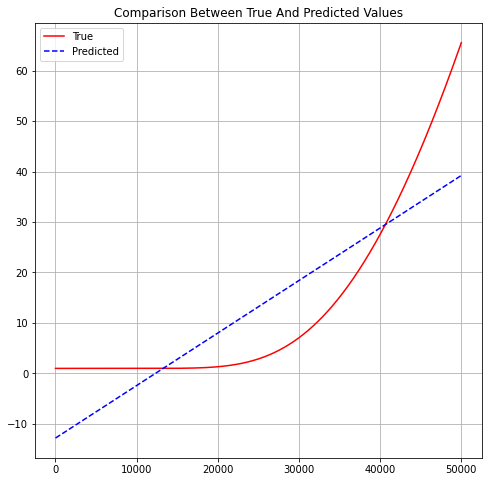

In [54]:
fig = plt.figure(figsize=(8,8))
plt.plot(T, Atom_Z_int, 'r-', label='True')
plt.plot(arr1, arr2, 'b--', label='Predicted')
plt.grid()
plt.title("Comparison Between True And Predicted Values")
plt.legend(loc='best')
plt.show()